In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import plotly.express as px 
import plotly.io as pio
pio.renderers.default='notebook'
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from scipy.stats import chi2_contingency
import prince

### Análise dos dados

In [10]:
casas = pd.read_excel('/home/usp_ds_analytics/unsupervised_models/data/preco_casas_completo.xlsx')

In [11]:
casas.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size_class,property_value
0,201,177,3,1,No,Yes,Yes,No,3.3,Yes,10,No,6.8,0.90,Zero,165432
1,196,182,4,3,Yes,Yes,No,Yes,1.2,Yes,11,No,4.1,1.42,One,187043
2,198,182,4,4,Yes,Yes,No,Yes,5.9,No,20,No,2.1,4.12,One,148658
3,178,166,2,3,No,Yes,No,No,5.9,No,5,No,0.7,4.36,Zero,123785
4,183,165,3,1,Yes,Yes,No,No,3.8,Yes,8,No,0.7,0.42,Zero,156470


In [12]:
casas.tail()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size_class,property_value
4949,297,261,4,4,Yes,Yes,Yes,Yes,2.9,Yes,20,No,4.1,3.99,Two,235882
4950,302,282,4,2,Yes,Yes,Yes,Yes,3.8,Yes,12,Yes,4.8,2.09,Two,290995
4951,153,147,3,4,Yes,Yes,No,No,3.3,Yes,7,No,4.7,3.98,Three,106428
4952,180,158,2,1,No,Yes,No,Yes,2.2,No,1,No,3.4,3.75,Two,107579
4953,695,619,8,6,Yes,Yes,Yes,Yes,0.4,Yes,5,No,0.4,4.64,Two,537980


In [13]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   large_living_room           4954 non-null   object 
 5   parking_space               4954 non-null   object 
 6   front_garden                4954 non-null   object 
 7   swimming_pool               4954 non-null   object 
 8   distance_to_school          4954 non-null   float64
 9   wall_fence                  4954 non-null   object 
 10  house_age                   4954 non-null   int64  
 11  water_front                 4954 non-null   object 
 12  distance_to_supermarket_km  4954 non-null   float64
 13  crime_rate_index            4954 

In [14]:
casas.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
land_size_sqm,4954.0,NaN,NaN,NaN,250.131409,103.131939,100.0,180.0,235.0,295.0,796.0
house_size_sqm,4954.0,NaN,NaN,NaN,231.250908,94.571642,85.0,165.0,217.5,274.0,760.0
no_of_rooms,4954.0,NaN,NaN,NaN,3.788252,1.585371,1.0,3.0,4.0,5.0,8.0
no_of_bathrooms,4954.0,NaN,NaN,NaN,3.199839,1.6023,1.0,2.0,3.0,4.0,9.0
large_living_room,4954,2,Yes,3586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parking_space,4954,2,Yes,3784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
front_garden,4954,2,Yes,3109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
swimming_pool,4954,2,Yes,3060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_to_school,4954.0,NaN,NaN,NaN,3.454219,2.007358,0.1,1.7,3.4,5.2,6.9
wall_fence,4954,2,Yes,3123,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variáveis qualitativas

In [15]:
# Vamos separar o banco de dados com variáveis qualitativas
casas_quali = casas[['large_living_room', 
                     'parking_space', 
                     'front_garden',
                     'swimming_pool',
                     'wall_fence',
                     'water_front',
                     'room_size_class']]

- separamos variáveis quali 
- Vamos fazer uma Análise de correspondência múltipla (MCA)
- chi2: como temos muitas variáveis, escolhemos uma e comparamos todas variáveis com ela
- avaliamos o p-value de cada um destes chi2
- elaborando a MCA. n_components = 2, ou seja, 2 dimensões, eixos x e y
- obter as coordenadas padrão das categorias (columns)
- obter as coordenadas padrão das observações (row)
- agora temos as variáveis métricas para as duas dimensões (valores médios dos eixos x e y)
- plotar o mapa perceptual das categorias das variáveis

Variáveis quanti
- o que falta? as coordenadas de observações das variáveis quali
- agora podemos aplicar a fatorial (todas métricas)
- teste de esfericidade de Bartlett
- se p-valeu < 0, temos uma matriz de correlações de Pearson é estatisticamente diferente da matriz identidade
- quantos fatores? como não sabemos, colocamos todos os possíveis fatores (10)
- agora precisamos aplicar o critério da raiz latente, para isso puxamos os autovalores com os eigenvalues
- quantos fatores são acima de 1?
- puxamos as estatísticas de cada fator
- avaliação das cargas fatoriais (loadings) - as correlações de pearson entre as variáveis originais e os fatores extraídos
- extraímos as comunalidades. Há perdas relevantes por variável? é expressa em %
- extração dos fatores para as observações
- identificando os scores fatoriais (weight)
- depois dos outputs, vêm o trabalho de análise destes dados.
:)



In [18]:
# Tabelas de frequências das variáveis
for v in casas_quali:
    print(casas_quali[v].value_counts())

large_living_room
Yes    3586
No     1368
Name: count, dtype: int64
parking_space
Yes    3784
No     1170
Name: count, dtype: int64
front_garden
Yes    3109
No     1845
Name: count, dtype: int64
swimming_pool
Yes    3060
No     1894
Name: count, dtype: int64
wall_fence
Yes    3123
No     1831
Name: count, dtype: int64
water_front
No     4713
Yes     241
Name: count, dtype: int64
room_size_class
Two      1779
One      1460
Three    1198
Zero      517
Name: count, dtype: int64


### Teste Chi2
- Para simplificar, vamos colocar 'large_living_room' como referência
- Vamos testar todas as associações com 'large_living_room'
- Se alguma não passar, avaliaremos com outra variável

In [19]:
referencia = 'large_living_room'

for column in casas_quali:
    tabela_mca = chi2_contingency(pd.crosstab(casas_quali[referencia], casas_quali[column]))
    p_value = round(tabela_mca[1], 4)
    print(f"p-valor da estatística ({column}): {p_value}")


p-valor da estatística (large_living_room): 0.0
p-valor da estatística (parking_space): 0.0
p-valor da estatística (front_garden): 0.0
p-valor da estatística (swimming_pool): 0.0
p-valor da estatística (wall_fence): 0.0
p-valor da estatística (water_front): 0.0031
p-valor da estatística (room_size_class): 0.0


Todas as variáveis aqui são estatisticamente significantes, ou seja, p_value < 0 

### Elaborando a MCA - análise de componentes múltiplos

In [20]:
# Antes de elaborar a ACM, vamos retirar os "_" nos nomes das variáveis
# É um procedimento operacional para facilitar a geração do mapa perceptual 
casas_quali.columns = casas_quali.columns.str.replace("_", "-") 

# Elaborando a ACM com 2 dimensões
mca = prince.MCA(n_components=2).fit(casas_quali)

In [21]:
tabela_autovalores = mca.eigenvalues_summary
print(tabela_autovalores)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.354        27.50%                     27.50%
1              0.146        11.36%                     38.86%


Os dois componentes capturaram 38.86% das informações, das variâncias.

In [22]:
# Obtendo as coordanadas-padrão das categorias das variáveis
coord_padrao = mca.column_coordinates(casas_quali)/np.sqrt(mca.eigenvalues_)
print(coord_padrao)

                              0         1
large-living-room_No   1.642017 -0.250120
large-living-room_Yes -0.626403  0.095417
parking-space_No       2.027691  0.169884
parking-space_Yes     -0.626955 -0.052527
front-garden_No        1.530090 -0.050982
front-garden_Yes      -0.908014  0.030255
swimming-pool_No       1.491699  0.152553
swimming-pool_Yes     -0.923294 -0.094423
wall-fence_No          1.459860  0.094822
wall-fence_Yes        -0.855909 -0.055594
water-front_No         0.019780 -0.432450
water-front_Yes       -0.386821  8.457009
room-size-class_One    0.491550 -2.538480
room-size-class_Three -0.977508  0.029986
room-size-class_Two   -0.275024  1.239888
room-size-class_Zero   1.823326  2.832683


In [23]:
# Obtendo as coordanadas-padrão das observações
coord_obs = mca.row_coordinates(casas_quali)
coord_obs.rename(columns={0: 'dim1_mca', 1: 'dim2_mca'}, inplace=True)
print(coord_obs)

      dim1_mca  dim2_mca
0     0.369421  0.317828
1    -0.141592 -0.447006
2     0.189233 -0.425518
3     1.048545  0.327711
4     0.393661  0.355585
...        ...       ...
4949 -0.599403  0.104366
4950 -0.657489  1.374289
4951 -0.006458 -0.044800
4952  0.403782  0.064887
4953 -0.599403  0.104366

[4954 rows x 2 columns]


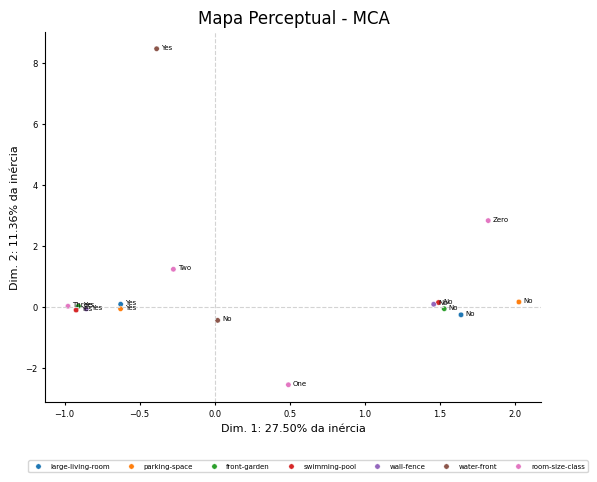

In [24]:
# Plotando o mapa perceptual (coordenadas-padrão)
chart = coord_padrao.reset_index()

var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])
# Nota: para a função acima ser executada adequadamente, não deixar underline no nome original da variável no dataset!

nome_categ=[]
for col in casas_quali:
    nome_categ.append(casas_quali[col].sort_values(ascending=True).unique())
    categorias = pd.DataFrame(nome_categ).stack().reset_index()

chart_df_mca = pd.DataFrame({'categoria': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variavel': var_chart,
                             'categoria_id': categorias[0]})

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=5)

label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['categoria_id'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variavel', s=15)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.legend(bbox_to_anchor=(1.1,-0.15), fancybox=True, shadow=False, ncols=7, fontsize='5')
plt.title("Mapa Perceptual - MCA", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=8)
plt.show()

### Variáveis métricas

In [25]:
# Separando as variáveis originalmente métricas
casas_quanti = casas[['land_size_sqm',
                      'house_size_sqm',
                      'no_of_rooms',
                      'no_of_bathrooms',
                      'distance_to_school',
                      'house_age',
                      'distance_to_supermarket_km',
                      'crime_rate_index']]

In [26]:
# Adicionando as coordenadas das observações extraídas da ACM
casas_quanti =pd.concat([casas_quanti, coord_obs], axis=1)
casas_quanti.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,dim1_mca,dim2_mca
0,201,177,3,1,3.3,10,6.8,0.90,0.369421,0.317828
1,196,182,4,3,1.2,11,4.1,1.42,-0.141592,-0.447006
2,198,182,4,4,5.9,20,2.1,4.12,0.189233,-0.425518
3,178,166,2,3,5.9,5,0.7,4.36,1.048545,0.327711
4,183,165,3,1,3.8,8,0.7,0.42,0.393661,0.355585


### Teste de Esfericidade de Bartlett

In [27]:
bartlett, p_value = calculate_bartlett_sphericity(casas_quanti)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 37339.12
p-valor: 0.0


### PCA

In [28]:
# Definindo a PCA (procedimento inicial com todos os fatores possíveis)
fa = FactorAnalyzer(n_factors=10, method='principal', rotation=None).fit(casas_quanti)

In [29]:
# Obtendo todos os possíveis autovalores
autovalores = fa.get_eigenvalues()[0]
print(autovalores)

[4.0410849  1.027185   1.01473555 1.00711342 0.9892809  0.96253178
 0.45721138 0.4111426  0.08113185 0.00858261]


In [31]:
# Soma dos autovalores
print(round(autovalores.sum(), 2))

10.0


In [32]:
# Aplicando o critério da raiz latente
sel_fator = sum(autovalores > 1)
print(f'Quantidade de fatores selecionados: {sel_fator}')

Quantidade de fatores selecionados: 4


In [33]:
# Redefinindo a PCA (critério da raiz latente)
fa = FactorAnalyzer(n_factors=sel_fator, method='principal', rotation=None).fit(casas_quanti)

In [34]:
# Eigenvalues, variâncias e variâncias acumuladas
autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   4.041085   0.404108             0.404108
Fator 2   1.027185   0.102718             0.506827
Fator 3   1.014736   0.101474             0.608301
Fator 4   1.007113   0.100711             0.709012


In [35]:
# Determinando as cargas fatoriais
cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = casas_quanti.columns

print(tabela_cargas)

                             Fator 1   Fator 2   Fator 3   Fator 4
land_size_sqm               0.951875 -0.007094  0.010473  0.012914
house_size_sqm              0.949457 -0.008913  0.010811  0.011206
no_of_rooms                 0.963547  0.011446 -0.006694 -0.011874
no_of_bathrooms             0.798642  0.005552 -0.004742  0.002089
distance_to_school         -0.011664  0.126432  0.637139 -0.319483
house_age                   0.006820 -0.068891  0.480943 -0.550164
distance_to_supermarket_km -0.003965  0.354536  0.509616  0.608264
crime_rate_index            0.013363  0.739787 -0.042701  0.082176
dim1_mca                   -0.816120 -0.012520  0.016249  0.031575
dim2_mca                    0.029461 -0.577083  0.339695  0.473488


Avaliação das cargas fatoriais (loadings) - as correlações de pearson entre as variáveis originais e os fatores extraídos.

In [36]:
# Determinando as comunalidades
comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = casas_quanti.columns
print(tabela_comunalidades)

                            Comunalidades
land_size_sqm                    0.906393
house_size_sqm                   0.901791
no_of_rooms                      0.928740
no_of_bathrooms                  0.637887
distance_to_school               0.524137
house_age                        0.538779
distance_to_supermarket_km       0.755405
crime_rate_index                 0.556040
dim1_mca                         0.667469
dim2_mca                         0.673476


Extraímos as comunalidades. Há perdas relevantes por variável? É expressa em %. No nosso caso, não existe perdas relevantes, pois os valores para as variáveis estão acima de 0.50

In [37]:
# Extração dos fatores para as observações do banco de dados
fatores = pd.DataFrame(fa.transform(casas_quanti))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados
casas = pd.concat([casas.reset_index(drop=True), fatores], axis=1)

In [38]:
casas.head()

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,large_living_room,parking_space,front_garden,swimming_pool,distance_to_school,wall_fence,house_age,water_front,distance_to_supermarket_km,crime_rate_index,room_size_class,property_value,Fator 1,Fator 2,Fator 3,Fator 4
0,201,177,3,1,No,Yes,Yes,No,3.3,Yes,10,No,6.8,0.90,Zero,165432,-0.762101,-0.767899,1.011815,1.450026
1,196,182,4,3,Yes,Yes,No,Yes,1.2,Yes,11,No,4.1,1.42,One,187043,-0.199405,-0.011080,-0.957941,-0.071491
2,198,182,4,4,Yes,Yes,No,Yes,5.9,No,20,No,2.1,4.12,One,148658,-0.181677,0.919471,0.638576,-2.022256
3,178,166,2,3,No,Yes,No,No,5.9,No,5,No,0.7,4.36,Zero,123785,-0.971617,-0.205182,-0.148357,-0.165236
4,183,165,3,1,Yes,Yes,No,No,3.8,Yes,8,No,0.7,0.42,Zero,156470,-0.839702,-2.026236,-0.477331,-0.285939


In [39]:
# Identificando os scores fatoriais
scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = casas_quanti.columns
print(tabela_scores)

                             Fator 1   Fator 2   Fator 3   Fator 4
land_size_sqm               0.235549 -0.006906  0.010321  0.012822
house_size_sqm              0.234951 -0.008677  0.010654  0.011127
no_of_rooms                 0.238438  0.011143 -0.006597 -0.011790
no_of_bathrooms             0.197631  0.005405 -0.004673  0.002074
distance_to_school         -0.002886  0.123086  0.627887 -0.317226
house_age                   0.001688 -0.067068  0.473959 -0.546278
distance_to_supermarket_km -0.000981  0.345153  0.502215  0.603968
crime_rate_index            0.003307  0.720208 -0.042081  0.081596
dim1_mca                   -0.201956 -0.012189  0.016013  0.031352
dim2_mca                    0.007290 -0.561810  0.334762  0.470144


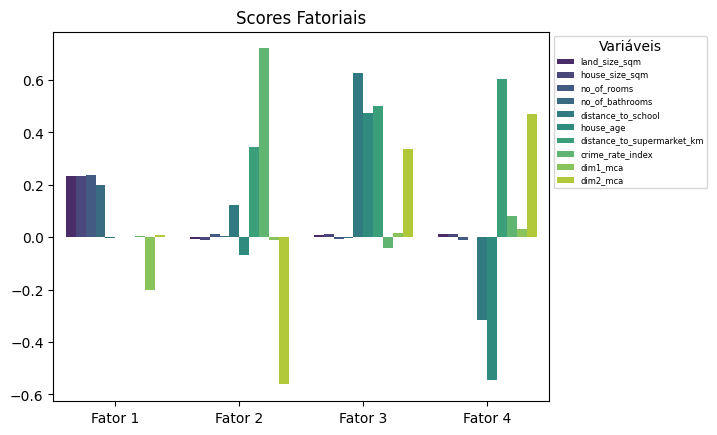

In [40]:
# Analisando os scores fatoriais em cada fator extraído
tabela_scores_graph = tabela_scores.reset_index()
tabela_scores_graph = tabela_scores_graph.melt(id_vars='index')

sns.barplot(data=tabela_scores_graph, x='variable', y='value', hue='index', palette='viridis')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Scores Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()